In [4]:
!pip install imblearn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [6]:
df  = pd.read_csv('/content/cuisines.csv')

In [7]:
#Check datashape
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
#datainfo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: >

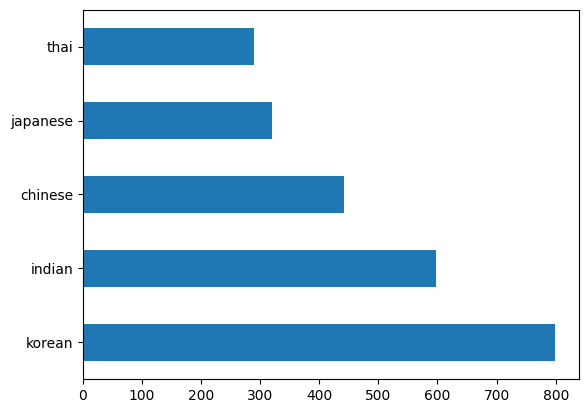

In [9]:
#plot data as bars by calling barh()
df.cuisine.value_counts().plot.barh()

In [10]:
#how much data is available per cuisine
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

#it will print number of rows and columns of each cuisine
print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


**Discovering** **ingredients**

> Now you can dig deeper into the data and learn what are the typical ingredients per cuisine. You should clean out recurrent data that creates confusion between cuisines, so let's learn about this problem.

Create a function **create_ingredient()** in Python to create an ingredient dataframe. This function will start by dropping an unhelpful column and sort through ingredients by their count:



In [11]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df
    df.head()

2. Call create_ingredient() and plot it calling barh():

<Axes: >

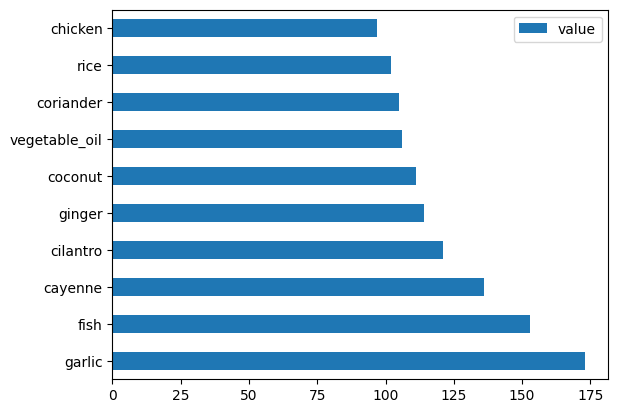

In [12]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

<Axes: >

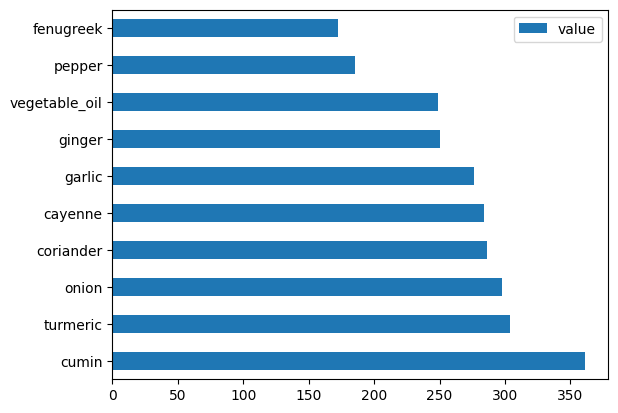

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

Now, drop the most common ingredients that create confusion between distinct cuisines, by calling drop():

Everyone loves rice
, garlic and ginger!

In [14]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Balance the dataset**

Now that you have cleaned the data, use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

Call fit_resample(), this strategy generates new samples by interpolation.

In [15]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance.

2. Now you can check the numbers of labels per ingredient:

In [16]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


The data is nice and clean, balanced, and very delicious!

The last step is to save your balanced data, including labels and features, into a new dataframe that can be exported into a file:

In [17]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

In [19]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("/content/cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB
